# Pymaceuticals Inc.
---

### Analysis

1. Of the four treatments analyzied in the boxplot, Capomulin and Ramicane result in smaller tumors than Infubinol and Ceftamin. 
2. There is a correlation between the mouse weight and the average tumor volume. Larger sized mice have larger tumors than smaller size mice.
3. The gender of the mice receiving the treatment is almost 50/50 with 51% male mice and 49% female mice. Gender does not appear to have an affect on the tumor volume.
 

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, how= 'left', on='Mouse ID')

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_metadata['Mouse ID'].count()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes_df = df[df.duplicated(['Mouse ID','Timepoint'])]
dupes_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dupe_rows = df.loc[(df['Mouse ID'] == 'g989')]
all_dupe_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.loc[df['Mouse ID'] != 'g989']
clean_df.head() 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
clean_total_df = clean_df.set_index(["Drug Regimen"])
per_drug_mean = clean_total_df.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].mean()
per_drug_median = clean_total_df.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].median()
per_drug_variance = clean_total_df.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].var()
per_drug_sd = clean_total_df.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].std()
per_drug_sem = clean_total_df.groupby(["Drug Regimen"])['Tumor Volume (mm3)'].sem()

per_drug_summary = pd.concat([per_drug_mean,
                              per_drug_median,
                              per_drug_variance,
                              per_drug_sd,
                              per_drug_sem],axis = 1)

per_drug_summary.columns = ['Mean Tumor Volume',
                            'Median Tumor Volume',
                            'Tumor Volume Variance',
                            'Tumor Volume Std.Dev.',
                            'Tumor Volume Std. Err.']

per_drug_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = clean_df.set_index(["Drug Regimen"])
summary_total_df = summary_df.groupby("Drug Regimen").aggregate({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})
summary_total_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

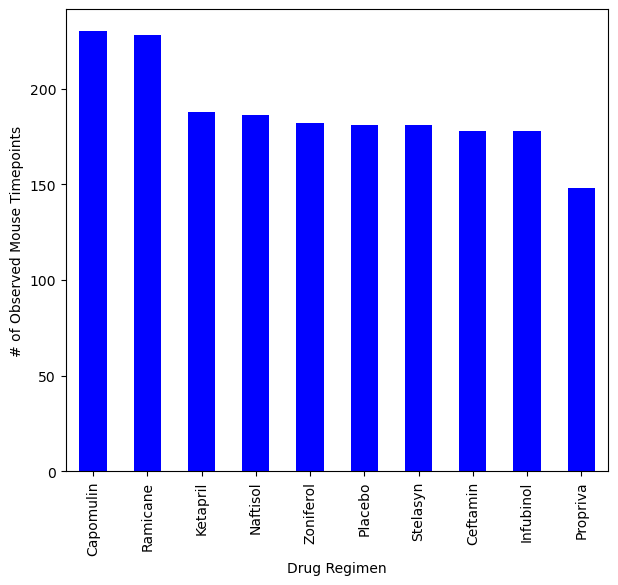

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
totals_by_drug = clean_df.groupby(['Drug Regimen'])['Timepoint'].count()
totals_by_drug = totals_by_drug.sort_values(ascending=False)
clean_df.columns
totals_by_drug = clean_df.groupby(['Drug Regimen'])['Timepoint'].count()
totals_by_drug = totals_by_drug.sort_values(ascending=False)
figure_1 = totals_by_drug.plot(kind="bar",facecolor="blue", figsize=(7,6),
                                #title="Major Collective Bargaining Settlements (1995)",
                                xlabel="Drug Regimen",
                                ylabel="# of Observed Mouse Timepoints"
)
#Set the xtick labels and hide them
xticklabels = totals_by_drug.index
figure_1.set_xticklabels(xticklabels, rotation=90, ha="center", wrap=False);

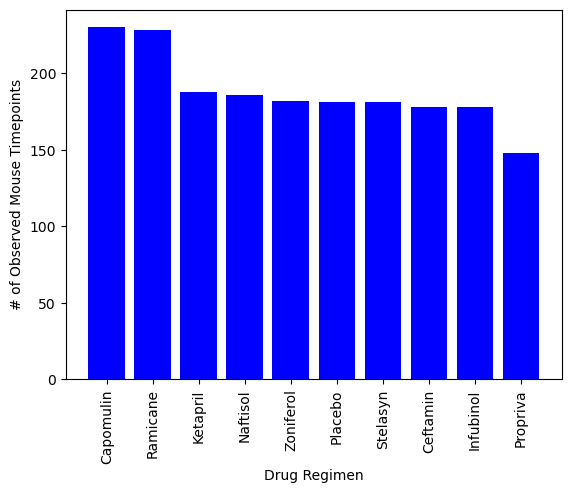

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
per_drug_totals = clean_df.groupby(["Drug Regimen"])['Timepoint'].count()
per_drug_totals = per_drug_totals.sort_values(ascending=False)
y_axis = per_drug_totals
x_axis = np.arange(len(per_drug_totals))
plt.bar(x_axis, y_axis, color='b',  align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, per_drug_totals.index.values)
plt.xticks(rotation=90)
#plt.xlim(-0.75, len(x_axis)-0.25)
#plt.ylim(0, max(y_axis)+250)
plt.show()

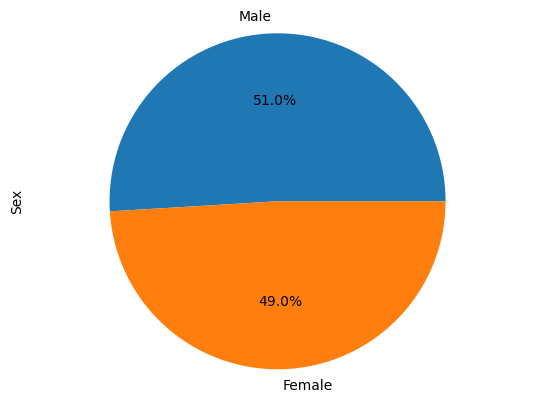

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = clean_df['Sex'].value_counts()
mice_pie = mice_sex.plot(kind="pie", y='Sex',autopct='%1.1f%%',legend=False)
mice_pie.set_ylabel("Sex")
plt.axis("equal")
plt.show()

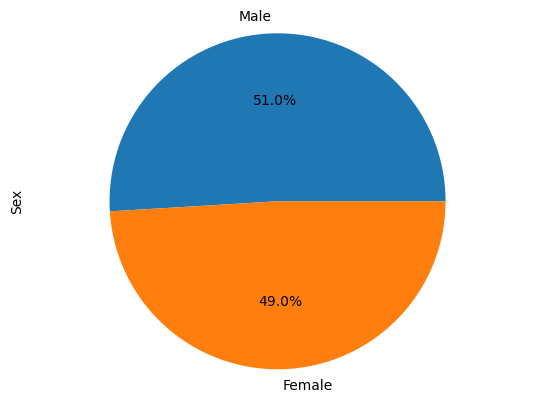

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = mice_sex.index 
plt.pie(mice_sex,  labels=labels, 
        autopct="%1.1f%%", shadow=False, startangle=0)
# Create axes which are equal so we have a perfect circle
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby(['Mouse ID']).max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_clean_df= pd.merge(max_timepoint,clean_df, how= 'left', on= ['Mouse ID','Timepoint'])
new_clean_df.reset_index()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,a203,45,67.973419,2,Infubinol,Female,20,23
1,1,a251,45,65.525743,1,Infubinol,Female,21,25
2,2,a262,45,70.717621,4,Placebo,Female,17,29
3,3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...,...
243,243,z435,10,48.710661,0,Propriva,Female,12,26
244,244,z578,45,30.638696,0,Ramicane,Male,11,16
245,245,z581,45,62.754451,3,Infubinol,Female,24,25
246,246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
capomulin = []
ramicane = []
infubinol = []
ceftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # # add subset 
for index, row in new_clean_df.iterrows():
    if row["Drug Regimen"] == "Capomulin":
        capomulin.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == "Ramicane":
       ramicane.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == "Infubinol":
       infubinol.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == "Ceftamin":
       ceftamin.append(row["Tumor Volume (mm3)"])

drug_totals = pd.DataFrame({"Capomulin": capomulin,
                            "Ramicane": ramicane,
                            "Infubinol": infubinol,
                            "Ceftamin": ceftamin
})
    
drug_totals
    # Determine outliers using upper and lower bounds


,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [15]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#for row in drug_totals:
#Capomulin
quartiles = drug_totals['Capomulin'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#Ramicane
quartiles = drug_totals['Ramicane'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#Infubinol
quartiles = drug_totals['Infubinol'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#Ceftamin
quartiles = drug_totals['Ceftamin'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outli

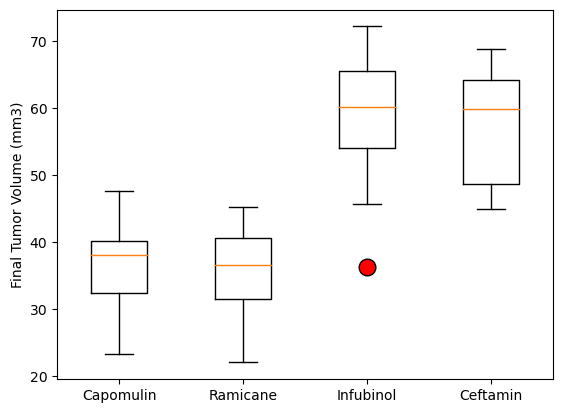

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(drug_totals,labels=treatments, flierprops= dict(markerfacecolor = "red", markersize=12))
plt.show()

## Line and Scatter Plots

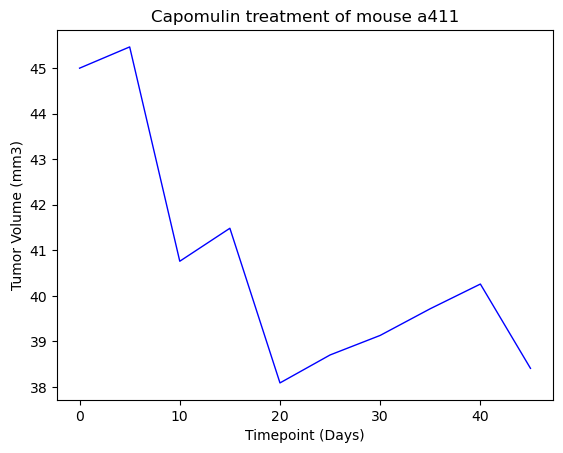

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_line_graph = clean_df.loc[clean_df['Mouse ID'] == 'a411']
x_axis= mouse_line_graph['Timepoint']
y_axis= mouse_line_graph['Tumor Volume (mm3)']
mouse_results = plt.plot(x_axis, y_axis, color="blue", linewidth=1)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (Days)")
plt.title("Capomulin treatment of mouse a411")
plt.show()

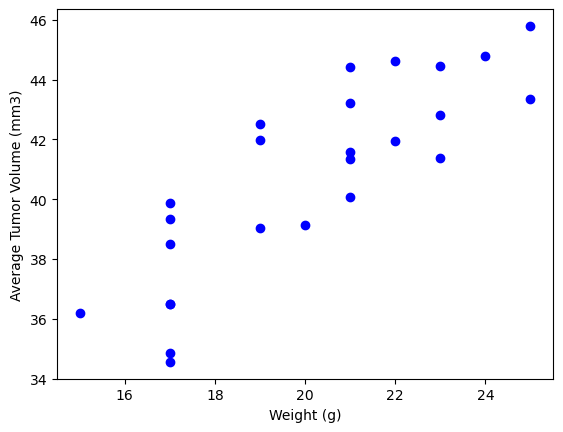

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_weight = clean_df.loc[(clean_df["Drug Regimen"] == 'Capomulin')]
avg_tumor = mouse_weight.groupby(['Mouse ID']).mean('Tumor Volume (mm3)')
plt.scatter(avg_tumor['Weight (g)'], avg_tumor['Tumor Volume (mm3)'], marker="o", facecolors="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


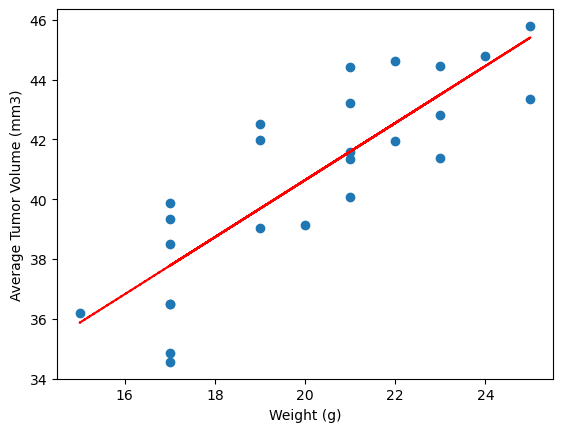

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight = avg_tumor.iloc[:,4]
avg_tumor_vol = avg_tumor.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_vol)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(mouse_weight, avg_tumor_vol)
pe_fit = pe_slope * mouse_weight + pe_int
plt.scatter(avg_tumor.iloc[:,4],avg_tumor.iloc[:,1])
plt.plot(mouse_weight,pe_fit,"--",c='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()